# Code for running SiameseNet and TripletNet on BRACOL Dataset

***The code used in this notebook is mostly from [this](https://github.com/adambielski/siamese-triplet/). If you are interested in it, check it out, it is extremely well documented***

***Install libs***

In [5]:
#!pip install learn2learn
#!pip install efficientnet_pytorch
#!pip install transformers

from IPython.display import clear_output 
# clear_output()

print('Done!')

Defaulting to user installation because normal site-packages is not writeable
Done!


***Import some libs***

In [2]:
import sys
#sys.path.insert(0, '/content/drive/MyDrive/pg/siamese_triplet_net/src/')
#sys.path.insert(0,'C:/Users/Mey/Documents/pg-coffee-main/siamese_triplet_net/src/')
sys.path.insert(0,'C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/')
import torch
device = torch.cuda.is_available()
from dataloaders import get_train_transforms, get_val_transforms, get_siamese_dataloader, get_triplet_dataloader
from networks import SiameseNet, TripletNet 
from models import *
from losses import ContrastiveLoss, TripletLoss
from trainer import fit
import torchvision



C:\Users\Mey\AppData\Roaming\Python\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mey\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Mey\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


***Define model hiperparams***

In [3]:
#from CustomViT import CustomViT
# model & optimizer & lr_scheduler

#=== دو خط زیر موقتا کامنت شده است آنرا برگردانیم
embedding_net = MobileNetv2()
model = TripletNet(embedding_net=embedding_net)

#embedding_net = ViTEmbeddingNet()
#model = TripletNet(embedding_net=embedding_net)

#model = CustomViT(num_classes=15)

#====این قسمت به صورت موقت برای لود امبدینگ مدل آموزش داده شده قبلی بر روی پلنت ویلج به کار میرود
#import torch
#model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_NFNet_15Shot.h5",map_location=torch.device('cpu'))
#model.load_state_dict(torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_NFNet_15Shot.h5",map_location=torch.device('cpu')) )
#Wmodel.eval()
#============================
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
loss_fn = TripletLoss(1.)
n_epochs=7 #100

if device:
    model.cuda()

log_interval =10 # 100

# path to data
#path_data = '/content/drive/MyDrive/pg/dataset/'
path_data='C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'

# define siamese train and val loaders
# this loader is implemented for datasets in ImageFolder format (https://pytorch.org/vision/stable/datasets.html#imagefolder)
triplet_train_loader = get_triplet_dataloader(root=path_data + '/train/', batch_size=5, transforms=get_train_transforms())
triplet_val_loader = get_triplet_dataloader(root=path_data + '/val/', batch_size=5, transforms=get_val_transforms())

 

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
fit(triplet_train_loader, triplet_val_loader, model, loss_fn, optimizer, lr_scheduler, n_epochs, device, log_interval)

Train: [0/225 (0%)]	Loss: 0.811715
Train: [50/225 (22%)]	Loss: 0.862498
Train: [100/225 (44%)]	Loss: 0.832092
Train: [150/225 (67%)]	Loss: 0.795570
Train: [200/225 (89%)]	Loss: 0.811708
Epoch: 1/7. Train set: Average loss: 0.8249
Epoch: 1/7. Validation set: Average loss: 0.7789
Estimated time of epoch: 1087.88 s
ETA:126.92 min
Train: [0/225 (0%)]	Loss: 0.684002
Train: [50/225 (22%)]	Loss: 0.756503
Train: [100/225 (44%)]	Loss: 0.736174
Train: [150/225 (67%)]	Loss: 0.672291
Train: [200/225 (89%)]	Loss: 0.727358
Epoch: 2/7. Train set: Average loss: 0.7129
Epoch: 2/7. Validation set: Average loss: 0.6257
Estimated time of epoch: 1078.24 s
ETA:107.82 min
Train: [0/225 (0%)]	Loss: 0.670749
Train: [50/225 (22%)]	Loss: 0.638039
Train: [100/225 (44%)]	Loss: 0.584748
Train: [150/225 (67%)]	Loss: 0.562382
Train: [200/225 (89%)]	Loss: 0.574017
Epoch: 3/7. Train set: Average loss: 0.5760
Epoch: 3/7. Validation set: Average loss: 0.5435
Estimated time of epoch: 1080.22 s
ETA:90.02 min
Train: [0/225 

In [5]:
# from: https://github.com/avilash/pytorch-siamese-triplet/blob/master/tsne.py
import cv2
import numpy as np
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
from torch.autograd import Variable
import os
import pandas as pd
import seaborn as sns
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        #device = 'cuda'
        model.eval()
        #model.to(device)
        labels = None
        embeddings = None
        for batch_idx, data in tqdm(enumerate(data_loader)):
            batch_imgs, batch_labels = data
            batch_labels = batch_labels.numpy()
           # batch_imgs = Variable(batch_imgs.to('cuda'))
            batch_E = model.get_embedding(batch_imgs)
            batch_E = batch_E.data.cpu().numpy()
            embeddings = np.concatenate((embeddings, batch_E), axis=0) if embeddings is not None else batch_E
            labels = np.concatenate((labels, batch_labels), axis=0) if labels is not None else batch_labels
    return embeddings, labels

def vis_tSNE(embeddings, labels, backbone='Convnet'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(16):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    # plt.title(f't-SNE', fontweight='bold', fontsize=24)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')



In [6]:
import torch
torch.save(model, "C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_Mobilenet_15Shot.h5" )
#===قسمت زیر به صورت موقت غیر فعال شد آنرا برگردانیم
#model = torch.load("C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese.h5",map_location=torch.device('cpu'))
#model.eval()
#======
path_data='C:/Users/Mey/Documents/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'

4121it [10:32,  6.51it/s]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


IndexError: list index out of range

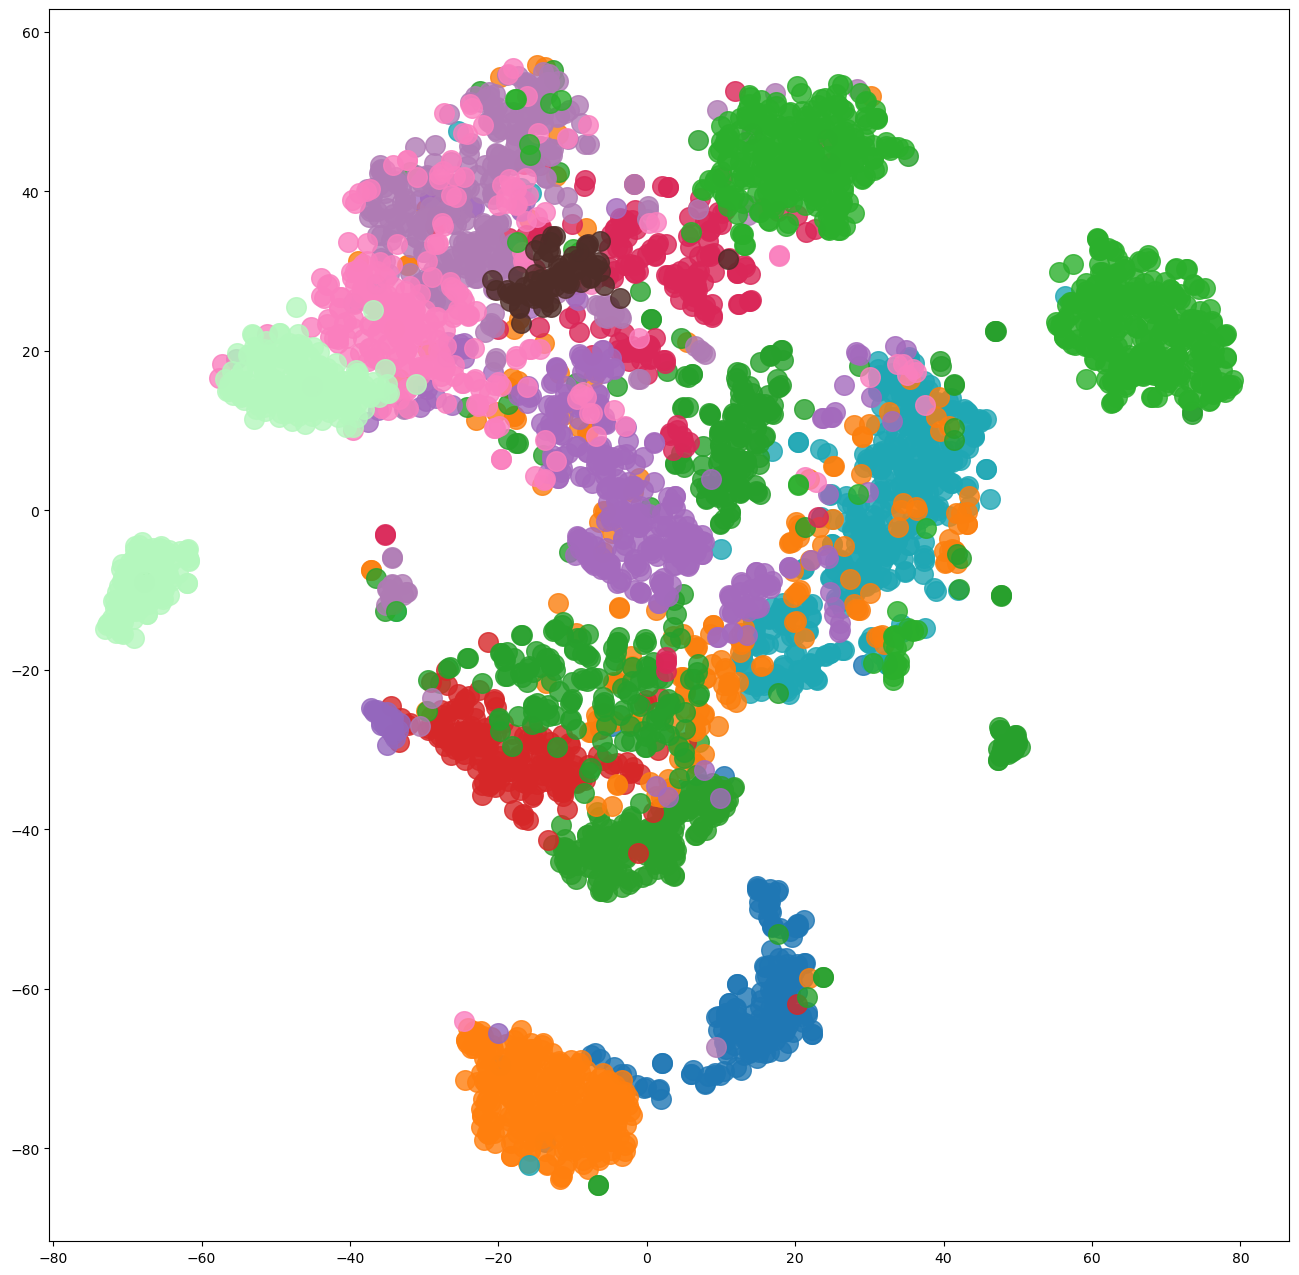

In [7]:
test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)

val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, model)
vis_tSNE(val_embeddings_cl, val_labels_cl)

In [8]:
train_data = torchvision.datasets.ImageFolder(root=path_data + '/train/', transform=get_val_transforms())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)

test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

x_train, y_train = generate_embeddings(train_loader, model)
x_test, y_true = generate_embeddings(test_loader, model)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

classifier = KNeighborsClassifier(n_neighbors=1)
# classifier = SVC()
# classifier = SGDClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
precision = round(precision_score(y_true, y_pred, average='macro')*100, 2)
recall = round(recall_score(y_true, y_pred, average='macro')*100, 2)
f1 = round(f1_score(y_true, y_pred, average='macro')*100, 2)
print(f'--- Results for MobileNetv2 Embeddings on KNN (k = 1) ---')
print(f'Accuracy Score:{accuracy}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'F1 Score: {f1}')

8it [00:27,  3.43s/it]
129it [08:20,  3.88s/it]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


--- Results for MobileNetv2 Embeddings on KNN (k = 1) ---
Accuracy Score:78.11
Precision Score: 74.74
Recall Score: 78.6
F1 Score: 75.48
